In [2]:
using JLD, HDF5
using PyPlot

In [3]:
include("src/PlotTools.jl")

PlotTools

In [4]:
include("src/CFTutils.jl")
import CFTutils
CFT = CFTutils

CFTutils

In [5]:
include("src/EDutils.jl")
include("src/LatCFT.jl")
import LatCFT
LCFT = LatCFT

LatCFT

In [6]:
cset = [(0.121569,0.466667,0.705882),(0.682353,0.780392,0.909804),(1.0,0.498039,0.054902),(1.0,0.733333,0.470588),(0.172549,0.627451,0.172549),(0.596078,0.87451,0.541176),(0.839216,0.152941,0.156863),(1.0,0.596078,0.588235),(0.580392,0.403922,0.741176),(0.772549,0.690196,0.835294),(0.54902,0.337255,0.294118),(0.768627,0.611765,0.580392),(0.890196,0.466667,0.760784),(0.968627,0.713725,0.823529),(0.498039,0.498039,0.498039),(0.780392,0.780392,0.780392),(0.737255,0.741176,0.133333),(0.858824,0.858824,0.552941),(0.0901961,0.745098,0.811765),(0.619608,0.854902,0.898039)];

In [7]:
pricols = cset[[1,3,9,10,7,13,14,19]];

In [8]:
##For TeX rendering of plot text, uncomment this.
#PyPlot.rc("font", family="serif")
#PyPlot.rc("font", size=11)
#PyPlot.rc("text", usetex=true)
#rc("text.latex", preamble="\\usepackage\{lmodern\}")

# Three-state Potts model demo

## Load data
To regenerate the data, run the "ED" script (this may require more memory than the average desktop computer has).

In [9]:
modelname = "potts3"

"potts3"

In [10]:
datapath = "data/";

In [11]:
ev_data = load("$(datapath)$(modelname)_redP_chg0_LCFTdata.jld", "ev");

In [12]:
Hs_data = load("$(datapath)$(modelname)_redP_chg0_LCFTdata.jld", "Hs");

In [13]:
norm_facs = LCFT.normalising_factors(ev_data, Hs_data)

Dict{Int64,Float64} with 11 entries:
  11 => 1.38081
  7  => 0.911198
  9  => 1.14356
  10 => 1.26177
  8  => 1.02651
  6  => 0.798639
  4  => 0.592856
  5  => 0.690884
  13 => 1.62057
  14 => 1.74103
  12 => 1.50046

## Central charge from the energy spectrum

a = 0.7694585568086068
ys = [-1.25274,-1.24006,-1.23326,-1.22918,-1.22655,-1.22474,-1.22346,-1.22251,-1.22178,-1.22122,-1.22078]
(a,b) = (-1.2179823302318522,-0.5475233675014493)
(a,b) = (0.8046977710218759,2.432677421269778)


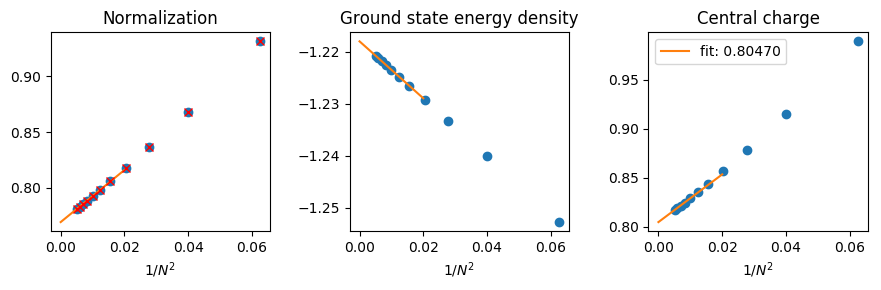

Ns = [4,5,6,7,8,9,10,11,12,13,14]
cs = [0.989098,0.915371,0.878381,0.857129,0.843822,0.834989,0.828882,0.824541,0.821399,0.819106,0.817435]


In [14]:
cs_en, nf_en = let Ns = sort(collect(keys(norm_facs))), fitlastn_zeta = 4, fitlastn_c = 5, fitlastn_e0 = 5
    figure(figsize=(9,3))
    subplot(131)
    
    #Compute normalization factors using lowest-energy p=±2 states
    E0s = [ev_data[n][1][1] for n in Ns]
    inds = Dict((n, findfirst(p->abs(p-2.0) < 1e-10, angle(ev_data[n][2])/2π * n)) for n in Ns)
    Ep2s = [ev_data[n][1][inds[n]] for n in Ns]
    nfs_mod = 2./(Ep2s - E0s)
    norm_facs_en = Dict{Int, Float64}((Ns[j], nfs_mod[j]) for j in 1:length(Ns))
    nfs = 2π * nfs_mod ./ Ns
    
    #Normalization factors from T states
    nfsT = [2π * norm_facs[N] / N for N in Ns]
    
    xs = 1./Ns.^2
    title("Normalization")
    plot(xs, nfs, "o")
    xlabel(L"1/N^2")
    #xlim((0.0,0.021))
    #ylim((0.498,0.532))
    
    #Extrapolate a normalization factor (not used in the following)
    a, b = linreg(xs[end-fitlastn_zeta:end], nfs[end-fitlastn_zeta:end])
    fitxs = [0.0, 0.02]
    plot(fitxs, a + b * fitxs, "-")
    @show a
    plot(xs, nfsT, "rx")
    
    #Extrapolate the ground-state energy density e0
    subplot(132)
    title("Ground state energy density")
    xs = 1./Ns.^2
    e0s = [ev_data[N][1][1] for N in Ns]
    ys = (e0s ./ Ns)
    @show ys
    plot(xs, ys, "o")
    xlabel(L"1/N^2")
    a, b = linreg(xs[end-fitlastn_e0:end], ys[end-fitlastn_e0:end])
    plot(fitxs, a + b * fitxs, "-")
    @show a, b
    e0 = a
    
    #Subracting N*e0, extrapolate an estimate for c!
    subplot(133)
    title("Central charge")
    cs = -6/π * (e0s./Ns - e0) .* Ns.^2 .* nfs
    plot(xs, cs, "o")
    xlabel(L"1/N^2")
    a, b = linreg(xs[end-fitlastn_c:end], cs[end-fitlastn_c:end])
    fitxs = [0.0, 0.02]
    astr = @sprintf "%.5f" real(a)
    plot(fitxs, a + b * fitxs, "-", label="fit: $astr")
    @show a, b
    legend()

    tight_layout()

    @show Ns
    @show cs
    cs, norm_facs_en
end;

## Central charge comparison

ns[fitn] = [9,10,11,12,13,14]

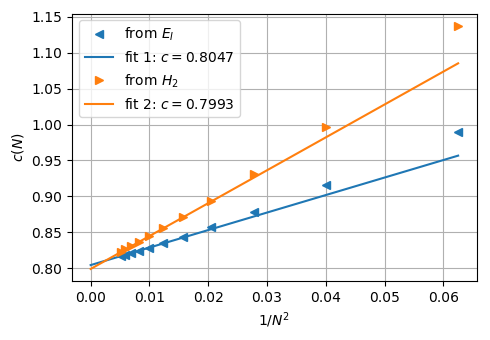

In [15]:
let ns = sort(collect(keys(ev_data))), Npow = 2
    cs = [real(LCFT.estimate_c(Hs_data[n])) for n in ns]
    
    fitn = length(ns)-5:length(ns)
    a1, b1 = linreg(1 ./ ns[fitn].^Npow, cs[fitn])
    @show ns[fitn]
    
    figure(figsize=(5,3.5))
    
    xs = 1 ./ ns.^Npow
    xs_fit = [0.0, maximum(xs)]

    plot(xs, cs_en, "<", label="from \$E_I\$", color=cset[1])
    
    a2, b2 = linreg(1 ./ ns[fitn].^Npow, cs_en[fitn])
    a2str = @sprintf "%.4f" real(a2)
    plot(xs_fit, a2 + b2 * xs_fit, "-", label="fit 1: \$c=$(a2str)\$", color=cset[1])
    
    plot(xs, cs, ">", label="from \$H_2\$", color=cset[3])
    a1str = @sprintf "%.4f" real(a1)
    plot(xs_fit, a1 + b1 * xs_fit, "-", label="fit 2: \$c=$(a1str)\$", color=cset[3])
    
    xlabel("\$1/N^{$(Npow)}\$")
    ylabel(L"c(N)") #, fontsize=13)
    legend()
    grid()
    
    tight_layout()
end

## Identify eigenstates that are primary

All primary states of the charge 0 sector successfully identified.

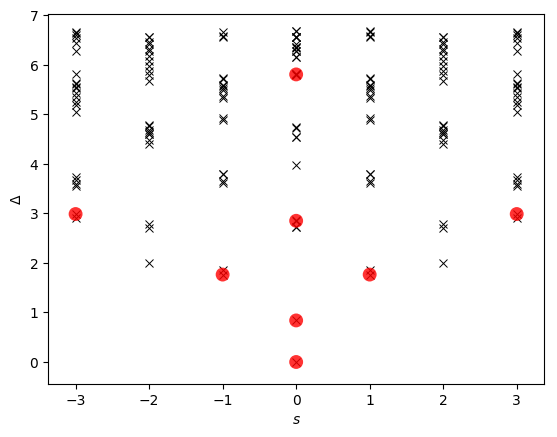

([1,2,3,4,15,19,20,103],[0.0,3.66671e-15,3.84571e-13,3.21968e-13,0.457482,0.481651,0.320574,0.320574,0.826601,0.826601  …  3.74921,3.91901,3.91901,1.57664,1.57664,1.26205,1.27951,0.986613,0.986616,1.69726])

In [16]:
let N = 14, eps = 0.1
    LCFT.plot_ps(ev_data[N], Hs_data[N], N, eps, norm_fac=norm_facs[N], mom_res=1)
    #savefig("primaries_e$(eps)_N$(N)_$(modelname).pdf")
end

## Plot Virasoro towers

Note: Unlike the initial versions of the paper, this data has $|S| \le 3$ for all energies. This will somewhat affect how finite-size corrections show up in the identification of Virasoro secondary states.

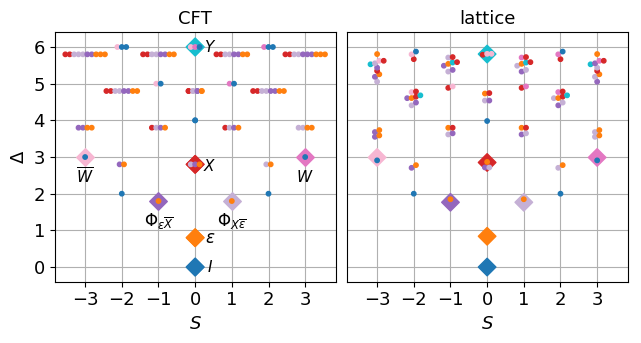

In [19]:
let N = 14, eps = 0.2
    f, axs = subplots(1, 2, sharey=true, figsize=(6.6,3.5+0.12))
    axs[1][:set_aspect]("equal")
    axs[2][:set_aspect]("equal")
    sca(axs[2])
    PyPlot.rc("font", size=13)
    title("lattice", fontsize=13)
    LCFT.plot_H1H2_towers(ev_data[N], Hs_data[N], norm_facs[N], N,
                          Int[103,19,20,15,3,4,2,1], cs=reverse(pricols), maxDelta=5.9,
                          pex_yrange=0.08, pex_xspace=0.12, pex_rounddigits=2, sz=10, szp=80)
    
    xlim((-3.7,+3.7))
    ylim((-0.4, 6.4))
    xticks(collect(-3:3))
    yticks(collect(0:6))
    axs[2][:yaxis][:set_ticks_position]("none") 
    grid()
    xlabel(L"S")
    #ylabel(L"\Delta")
    
    sca(axs[1])
    title("CFT", fontsize=13)
    #title(L"H^{CFT}")
    
    ops = [CFT.potts3_cft_Y, CFT.potts3_cft_eye_Y, CFT.potts3_cft_Y_eye, CFT.potts3_cft_X, 
           CFT.potts3_cft_X_eps, CFT.potts3_cft_eps_X, CFT.potts3_cft_epsilon, CFT.potts3_cft_eye]

    CFT.plot_sops_v3(ops, reverse(pricols), 6.0, sz=10, szp=80, shift_pris=false, maxspin=3.0)
    
    annotate(L"Y", xy=(0.4,6.0), fontsize=11, va="center", ha="center")
    annotate(L"X", xy=(0.4,2.75), fontsize=11, va="center", ha="center")
    annotate(L"\varepsilon", xy=(0.4,0.8), fontsize=12, va="center", ha="center")
    annotate(L"I", xy=(0.4,0.0), fontsize=11, va="center", ha="center")
    
    annotate(L"\Phi_{X\overline{\varepsilon}}", xy=(1.0,1.25), fontsize=12, va="center", ha="center")
    annotate(L"\Phi_{\varepsilon\overline{X}}", xy=(-1.0,1.25), fontsize=12, va="center", ha="center")
    annotate(L"W", xy=(3.0,2.45), fontsize=11, va="center", ha="center")
    annotate(L"\overline{W}", xy=(-3.0,2.45), fontsize=11, va="center", ha="center")
    
    #plot([-4,+4], [3.5,3.5], "k--")
    xlim((-3.7,+3.7))
    ylim((-0.4, 6.4))
    xticks(collect(-3:3))
    yticks(collect(0:6))
    grid()
    #xlim((-4,+4.5))
    xlabel(L"S")
    ylabel(L"\Delta")
    #legend(loc=4)
    tight_layout()
    f[:subplots_adjust](wspace=0.04)
    #PlotTools.savepdf_cropped("plots/potts_p_qp_N$(N).pdf")
    #savefig("plots/potts_p_qp_N$(N).png", dpi=300)
end

(a,b) = (-0.007831936489880717,0.49074278154558476)
(a,b) = 

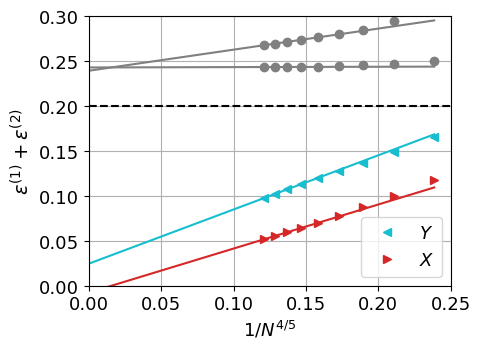

(0.02438130525678428,0.6035068674912971)
(a,b) = (0.5246409911714132,-0.39491472562392227)
(a,b) = (0.30759216449751864,0.10682038755715645)
(a,b) = (0.4268167306099897,0.401198101949962)
(a,b) = (0.4268167305787562,0.4011981021722123)
(a,b) = (0.9110572058267493,0.08142512388498914)
(a,b) = (0.24275072649052515,0.0038549923519056784)
(a,b) = (0.4353137668048473,0.5224686962691787)
(a,b) = (0.6584305055935918,0.015457506671248383)
(a,b) = (0.23908454219591974,0.23471156066229076)
(a,b) = (0.30882453835060963,0.8325901756610088)
(a,b) = (0.45698752132013865,0.4253600424639309)
(a,b) = (0.45617725524336694,0.011399280317946013)
(a,b) = (NaN,NaN)


In [18]:
let eps = 0.2, min_err = 1e-4, Npow = 0.8, Nsflt=collect(6:14), fit_Ns = collect(11:14)
    PyPlot.rc("font", size=13)
    figure(figsize=(5.0,3.7))
    d1 = LCFT.plot_scaling(ev_data, Hs_data, norm_facs, LCFT.ps, eps, min_err=min_err, 
        max_mom=2.0, max_en=3.5, Npow=Npow, Ns=Nsflt, fmt=">", col=pricols[5], fit_Ns=fit_Ns)
    d2 = LCFT.plot_scaling(ev_data, Hs_data, norm_facs, LCFT.ps, eps, plot_ratio=false, 
        max_mom=2.0, min_en=3.5, min_err=min_err, Npow=Npow, Ns=Nsflt, fmt="<", col=pricols[end], fit_Ns=fit_Ns)
    #leg = legend()
    handles, labels = gca()[:get_legend_handles_labels]()
    #handles = leg[:legendHandles]
    labels = [L"X", L"Y"]
    
    legend(labels=reverse(labels), handles=reverse(handles))
    d3 = LCFT.plot_scaling(ev_data, Hs_data, norm_facs, LCFT.ps, 1.0 * 0.5, min_err=eps, fmt="o", Npow=Npow, Ns=Nsflt, col="0.5", fit_Ns=fit_Ns)
    
    plot([0.0, 0.25], [0.2, 0.2], "k--")
    
    yscale("linear")
    xlabel(L"1/N^{4/5}")
    ylabel(L"\epsilon^{(1)} + \epsilon^{(2)}", fontsize=14)
    ylim((0.0,0.3))
    xlim((0.0, 0.25))
    grid("on")
    tight_layout()
    #PlotTools.savepdf_cropped("plots/$(modelname)_primary_errors.pdf")
    #savefig("plots/$(modelname)_primary_errors.png", dpi=300)
end